In [79]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment=None

In [80]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [81]:
tickers=tickers.Symbol.to_list()

In [82]:
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

In [83]:
tickers=[i.replace(".","-") for i in tickers]

In [84]:
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

In [85]:
import yfinance as yf

def RSIcalc(asset):
    df = yf.download(asset, start='2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['avg Up'] / df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100 - (100 / (x + 1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df


In [86]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df) - 11):  # Adjust the loop range to avoid going out of bounds
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            
        for j in range(1, 11):
            if i + j < len(df) and i + j + 1 < len(df) and df['RSI'].iloc[i+j] > 40:
                Selling_dates.append(df.iloc[i+j+1].name)
                break
            elif j == 10:
                Selling_dates.append(df.iloc[i+j+1].name)
                
    return Buying_dates, Selling_dates


In [87]:
frame=RSIcalc(tickers[0])
buy,sell=getSignals(frame)

[*********************100%***********************]  1 of 1 completed


In [88]:
buy

[Timestamp('2012-03-07 00:00:00'),
 Timestamp('2012-04-11 00:00:00'),
 Timestamp('2012-05-15 00:00:00'),
 Timestamp('2012-05-16 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-05-21 00:00:00'),
 Timestamp('2012-06-05 00:00:00'),
 Timestamp('2012-06-06 00:00:00'),
 Timestamp('2012-10-24 00:00:00'),
 Timestamp('2012-10-25 00:00:00'),
 Timestamp('2013-08-22 00:00:00'),
 Timestamp('2014-01-27 00:00:00'),
 Timestamp('2014-01-28 00:00:00'),
 Timestamp('2014-01-29 00:00:00'),
 Timestamp('2014-01-31 00:00:00'),
 Timestamp('2014-02-03 00:00:00'),
 Timestamp('2014-02-04 00:00:00'),
 Timestamp('2014-08-01 00:00:00'),
 Timestamp('2014-08-04 00:00:00'),
 Timestamp('2014-08-06 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2014-08-08 00:00:00'),
 Timestamp('2014-10-02 00:00:00'),
 Timestamp('2014-10-03 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2016-10-12 00:00:00'),
 Timestamp('2016-10-13 00:00:00'),
 Timestamp('2016-10-

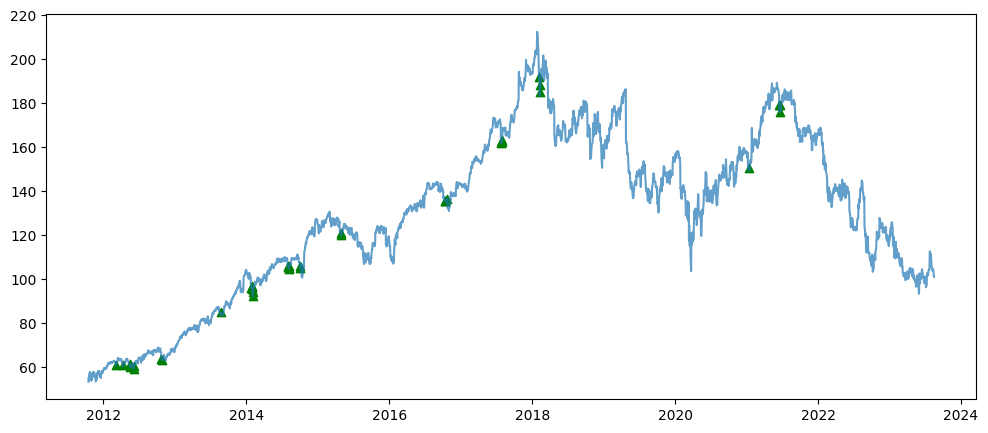

In [89]:
import matplotlib.pyplot as plt

# Your previous code here

plt.figure(figsize=(12, 5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker='^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

# Additional plotting code here if needed
plt.show()  # Display the plot

In [90]:
# Calculate Profits
buy_open_prices = frame.loc[buy]['Open'].values
sell_open_prices = frame.loc[sell]['Open'].values

# Check if the number of buy and sell points match
min_length = min(len(buy_open_prices), len(sell_open_prices))
buy_open_prices = buy_open_prices[:min_length]
sell_open_prices = sell_open_prices[:min_length]

profits = (sell_open_prices - buy_open_prices) / buy_open_prices

# Print or use the profits as needed
print(profits)


[-0.08188639 -0.08891757 -0.07643979 -0.06506814 -0.09318237 -0.07033851
 -0.03729258 -0.02030765 -0.10277436 -0.12058259 -0.31880997 -0.39347794
 -0.3898632  -0.39069952 -0.36579777 -0.37505852 -0.363074   -0.4199072
 -0.41805208 -0.41469022 -0.41956445 -0.41471646 -0.41762291 -0.43099119
 -0.5049739  -0.50838698 -0.54009436 -0.53810622 -0.54821892 -0.60234472
 -0.59199558 -0.59465112 -0.59334999 -0.63900488 -0.6347892  -0.64029188
 -0.51223628 -0.58384146 -0.58039783 -0.59099126]


In [91]:
wins=[i for i in profits if i > 0]

In [92]:
len(wins)/len(profits)

0.0

In [96]:
len(wins)

0

In [93]:
len(profits)

40

In [99]:
import pandas as pd
import yfinance as yf

tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = tickers.Symbol.to_list()
tickers = [i.replace(".", "-") for i in tickers]

def RSIcalc(asset):
    df = yf.download(asset, start='2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['avg Up'] / df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100 - (100 / (x + 1)))
    df['Buy'] = 'No'  # Initialize the 'Buy' column with 'No'
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    return df

def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df) - 11):  # Adjust the loop range to avoid going out of bounds
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            
        for j in range(1, 11):
            if i + j < len(df) and i + j + 1 < len(df) and df['RSI'].iloc[i+j] > 40:
                Selling_dates.append(df.iloc[i+j+1].name)
                break
            elif j == 10:
                Selling_dates.append(df.iloc[i+j+1].name)
                
    return Buying_dates, Selling_dates

matrixsignals = []
matrixprofits = []

for ticker in tickers:
    frame = RSIcalc(ticker)
    buy, sell = getSignals(frame)
    
    matching_dates = list(set(buy) & set(sell))  # Get matching dates
    
    buy_open_prices = frame.loc[matching_dates]['Open'].values
    sell_open_prices = frame.loc[matching_dates]['Open'].values
    
    profits = (sell_open_prices - buy_open_prices) / buy_open_prices
    
    matrixsignals.append(matching_dates)
    matrixprofits.append(profits)
    
# Now you can use the matrixsignals and matrixprofits lists as needed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [102]:
allprofit=[]

for i in matrixprofits:
    for e in i:
        all_profit.append(e)

In [106]:
if len(allprofit) > 0:
    win_rate = len(wins) / len(allprofit)
else:
    win_rate = 0.0
